In [ ]:
import numpy as np
import heapq
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
import copy

In [ ]:
# generating maze environments of size 101 x 101
class maze:

    def __init__(self, no_rows, no_columns):
        self.no_rows = no_rows
        self.no_columns = no_columns
        self.total_states=0
        self.source, self.target, self.maze = self.generate_maze()
        self.agent_position = self.source
        self.agent_mem = np.ones((no_rows,no_columns))

    def generate_maze(self):
        
        maze = np.random.uniform(size=(self.no_rows, self.no_columns))
        
        for row in range(self.no_rows):
            for col in range(self.no_columns):
                if maze[row][col] < 0.3:
                    maze[row][col] = 0
                else:
                    maze[row][col] = 1
        # Generating source and target
        source = np.random.randint(0, self.no_rows), np.random.randint(0, self.no_columns)
        target = np.random.randint(0, self.no_rows), np.random.randint(0, self.no_columns)
        
        # if source and target are at same point reassign the target value until they are not equal
        while source == target:
            target = np.random.randint(0, self.no_rows), np.random.randint(0, self.no_columns)

        # Marking source and target in the grid to be unblocked if they are blocked
        maze[source[0], source[1]] = 1
        maze[target[0], target[1]] = 1
        
        return source, target, maze
    
    def update_agent_map(self):

        (a,b)  = self.agent_position
        for child_node in ([[-1, 0], [1, 0], [0, 1], [0, -1]]):
            x = a + child_node[0]
            y = b + child_node[1]
            # check if the state is within the bounds of the grid
            if x < 0 or x > self.no_rows - 1 or y < 0 or y > self.no_columns - 1:
                continue
            elif self.maze[x][y] == 0:
                self.agent_mem[x][y] = 0




In [ ]:
def forwardAStar(maze):
    class State:
        def __init__(self, parent=None, position=None):
            
            #initialsiing pointer to point its immediate parent
            self.parent = parent
            self.point = position
            # heuristics calculation
            self.dist_f = 0
            self.dist_g = 0
            self.dist_h = 0
            self.search = 0
            self.agent_mem = 1
        
        '''tie breaking if f and g of two nodes are equal then calculate using random probability. If they both have 
        the same f value proceed with the least h value'''
        def __lt__(self, other):
            if self.dist_f == other.dist_f:
                if self.dist_g == other.dist_g:
                    return np.random.uniform() > .2
                else:
                    return self.dist_g > other.dist_g
            else:
                return self.dist_f < other.dist_f
        # def __eq__(self, other):
        #     return self.point == other
    
    found = True
    
    def computePath():
        path_next =[]
        while state_target.point != open_states[0].point:
             # pop the first state whith least f in open_states
            state_traversing = heapq.heappop(open_states)
            closed_states.append(state_traversing)
            path_next.append(state_traversing.point)
            maze.total_states+=1
            
            #check for neighbouring nodes of state_traversing
            for child_node in ([[-1, 0], [1, 0], [0, 1], [0, -1]]):
                x = state_traversing.point[0] + child_node[0]
                y = state_traversing.point[1] + child_node[1]
                
                # check if the state is within the bounds of the grid
                if x < 0 or x > maze.no_rows - 1 or y < 0 or y > maze.no_columns - 1:
                    continue
                    
                # check if the position in the maze is blocked and store it in the agent memory
                elif maze.agent_mem[x][y] == 0:
                    continue
                else:
                    state_expanded = agent_states[x][y]
                    
                #update the search values as they are found while traversing
                if state_expanded.search < counter:
                    state_expanded.dist_g = float('inf')
                    state_expanded.search = counter
                    
                '''if state expanded is new then update the value of the previous g + action cost, 
                As the action cost is 1 adding it directly''' 
                if state_expanded.dist_g > state_traversing.dist_g + 1:
                    state_expanded.dist_g = state_traversing.dist_g + 1
                    if state_expanded.parent is None :
                        state_expanded.parent = state_traversing

                
                    # remove the state in openstates if it is present and append new one with updated values
                    for index, state_temp in zip(range(len(open_states)), open_states):
                        if state_expanded.point == state_temp.point:
                            open_states[index] = open_states[0]
                            heapq.heappop(open_states)
                            heapq.heapify(open_states)
                    
                    #update the heuristics values
                    state_expanded.dist_h = abs(state_expanded.point[0] - state_target.point[0]) + abs(
                        state_expanded.point[1] - state_target.point[1])
                    state_expanded.dist_f = state_expanded.dist_g + state_expanded.dist_h
                    
                    #append it to the open states and reprioritise
                    heapq.heappush(open_states, state_expanded)
                    heapq.heapify(open_states)

            if len(open_states) == 0:
                break
        return path_next

    #####################################################
    counter = 0
    path_found = True

    #initiliase all states 
    agent_states = ([[State(None, (i, j)) for j in range(maze.no_columns)]
                     for i in range(maze.no_rows)])

    state_current = State(None, maze.source)
    state_target = State(None, maze.target)
   
    trace_path = []
    path_prev=[]
    path_next =[]

    while state_current.point != state_target.point:
   
        counter = counter + 1
        state_current.dist_g = 0
        state_current.search = counter
        state_target.search = counter
        state_target.dist_g = float('inf')
        trace_path.append(state_current.point)
        open_states = []
        closed_states = []

        state_current.dist_h = abs(state_current.point[0] - state_target.point[0]) + abs(
            state_current.point[1] - state_target.point[0])
        heapq.heappush(open_states, state_current)
        
        maze.agent_position = state_current.point
        maze.update_agent_map()
        
        path_prev = path_next
        path_next = computePath()


        if path_prev is None:
            continue
            display_path(path_next, maze)
        else :
            if path_prev[1:] != path_next :
                # continue
                display_path(path_next,maze)
                
     
        if len(open_states) == 0:
            found = False
            break
        #at this point of time the current sttae would be the target as the f of the targte from 
#          current positoin is less than any nodes in teh open states.
        current_node = open_states[0]
       
        # clearing the presumed path to recompute
        presumed_path=[]
        presumed_path.append(current_node.point)
        
        #tracking back to the position until we reach the agent position
        while current_node.point != state_current.point:
            current_node = current_node.parent
            presumed_path.append(current_node.point)
      
        
        '''move the agent to the next position in path by tracing the path found on 
         recalucating the path to the target again''' 
        agent_pos = presumed_path[-2]
        state_current = agent_states[agent_pos[0]][agent_pos[1]]
        
    trace_path.append(state_current.point)
    # check if path is found after all the iterations and if not found return "Not found" 
    if found == False:
        return "Path Not Found",found, maze.total_states
    else:
        return trace_path, found, maze.total_states
    



In [ ]:

def backwardAStar(maze):
    class State:
        def __init__(self, parent=None, position=None):
            self.parent = parent
            self.point = position
            # heuristics calculation
            self.dist_f = 0
            self.dist_g = 0
            self.dist_h = 0
            self.search = 0
            self.agent_mem = 1
        '''tie breaking if f and g of two nodes are equal then calculate using random probability. If they both have 
        the same f value proceed with the least h value'''
        def __lt__(self, other):
            if self.dist_f == other.dist_f:
                if self.dist_g == other.dist_g:
                    return np.random.uniform() > .5
                else:
                    return self.dist_g > other.dist_g
            else:
                return self.dist_f < other.dist_f
        
        # def __eq__(self, other):
        #     return self.point == other

    found = True
    def path_generation(path_next,point):
        (x,y) = path_next[-1]
        state_temp = agent_states[x][y]
        path_temp = []
        path_temp.append(state_temp.point)
        while state_temp.point != point:

            state_temp = state_temp.parent
            path_temp.append(state_temp.point)
        return path_temp

    def computePath():
        path_next =[]
        while state_target.point != open_states[0].point:

            state_traversing = heapq.heappop(open_states)
            closed_states.append(state_traversing)
            path_next.append(state_traversing.point)
            
            maze.total_states+=1
            #check for neighbouring nodes of state_traversing
            for child_node in ([[-1, 0], [1, 0], [0, 1], [0, -1]]):
                x = state_traversing.point[0] + child_node[0]
                y = state_traversing.point[1] + child_node[1]
                
                # check if the state is within the bounds of the grid
                if x < 0 or x > maze.no_rows - 1 or y < 0 or y > maze.no_columns - 1:
                    continue
                    
                # check if the position in the maze is blocked
                elif maze.agent_mem[x][y] == 0:
                    continue
                # assign a state if position is valid   
                else:
                    state_expanded = agent_states[x][y]
                
                #update the search values as teh state is traversed
                if state_expanded.search < counter:
                    state_expanded.dist_g = float('inf')
                    state_expanded.search = counter
                    
                if state_expanded.dist_g > state_traversing.dist_g + 1:
                    state_expanded.dist_g = state_traversing.dist_g + 1
                    if state_expanded.parent is None :
                        state_expanded.parent = state_traversing
                    
                    # remove the state in open states and appedn the new one
                    for index, state_temp in zip(range(len(open_states)), open_states):
                        if state_expanded.point == state_temp.point:
                            open_states[index] = open_states[0]
                            heapq.heappop(open_states)
                            heapq.heapify(open_states)

                    state_expanded.dist_h = abs(state_expanded.point[0] - state_target.point[0]) + abs(
                        state_expanded.point[1] - state_target.point[1])
                    state_expanded.dist_f = state_expanded.dist_g + state_expanded.dist_h
                    #appedn the new states
                    heapq.heappush(open_states, state_expanded)
                    heapq.heapify(open_states)

            if len(open_states) == 0:
                break
        return path_next
    
    #####################################################
    counter = 0
    path_found = True

    agent_states = ([[State(None, (i, j)) for j in range(maze.no_columns)]
                     for i in range(maze.no_rows)])

    state_current = State(None, maze.target)
    state_target = State(None, maze.source)

    # to differentiate other cells from source and target
    # state_source.agent_mem = 4
    # state_target.agent_mem = 5
    trace_path = []
    path_prev=[]
    path_next =[]
    presumed_path=[]
    trace_path.append(state_target.point)
    while state_current.point != state_target.point:
        # trace_path=[]
        counter = counter + 1
        state_current.dist_g = 0
        state_current.search = counter
        state_target.search = counter
        state_target.dist_g = float('inf')
        trace_path.append(state_current.point)
        open_states = []
        closed_states = []

        state_current.dist_h = abs(state_current.point[0] - state_target.point[0]) + abs(
            state_current.point[1] - state_target.point[0])
        heapq.heappush(open_states, state_current)
        
        maze.agent_position = state_current.point
        maze.update_agent_map()
        
        path_prev = path_next
        path_next = computePath()
        # path_next = path_generation(path_next,state_current.point)
        

        if len(open_states) == 0:
            found = False
            break

        current_node = open_states[0]
        #         print(current_node.point)
        
        presumed_path = []
        presumed_path.append(current_node.point)
        while current_node.point != state_current.point:
            current_node = current_node.parent
            #             print(current_node.point)
            presumed_path.append(current_node.point)
        # if current_node.point == state_source.point:
        #     break
        
        
        
        # if len(path_prev) < 2:
        #     display_path(path_next, maze)
        # else :
        #     if path_prev[1:] != path_next :
        #         continue
        #         display_path(path_next,maze)
        
        coord = presumed_path[-2]
        # trace_path=[]
        state_current = agent_states[coord[0]][coord[1]]
        #  print(state_current.point)
        
    if found == False:
        return "Path Not Found",found, maze.total_states
    else:
#         path=[]
#         state_obj = state_current.parent
#         while(state_obj.parent is not None):
#             path.append(state_obj.point)
#             state_obj = state_obj.parent
        return trace_path, found, maze.total_states





In [ ]:

# # Adaptive

# In[34]:


def AdaptiveAStar(maze):
    class State:
        def __init__(self, parent=None, position=None):
            self.parent = parent
            self.point = position
            # heuristics calculation
            self.dist_f = 0
            self.dist_g = 0
            self.dist_h = 0
            self.search = 0
            self.agent_mem = 1
        '''tie breaking if f and g of two nodes are equal then calculate using random probability. If they both have 
        the same f value proceed with the least h value'''
        def __lt__(self, other):
            if self.dist_f == other.dist_f:
                if self.dist_g == other.dist_g:
                    return np.random.uniform() > .5
                else:
                    return self.dist_g > other.dist_g
            else:
                return self.dist_f < other.dist_f
        # def __eq__(self, other):
        #     return self.point == other

    found = True
   
    def computePath():

        while state_target.point != open_states[0].point:

            state_traversing = heapq.heappop(open_states)
            closed_states.append(state_traversing)
            expanded_total_states.append(1)
            
            #traverse through neighbours
            for child_node in ([[-1, 0], [1, 0], [0, 1], [0, -1]]):
                x = state_traversing.point[0] + child_node[0]
                y = state_traversing.point[1] + child_node[1]
                
                # check if the state is within the bounds of the grid
                if x < 0 or x > maze.no_rows - 1 or y < 0 or y > maze.no_columns - 1:
                    continue
                # check if the position in the maze is blocked
                elif maze.agent_mem[x][y] == 0:
                    continue
                else:
                    state_expanded = agent_states[x][y]
                  
                ##update the search values as traversing through states
                if state_expanded.search < counter:
                    state_expanded.dist_g = float('inf')
                    state_expanded.search = counter
                    
                if state_expanded.dist_g > state_traversing.dist_g + 1:
                    state_expanded.dist_g = state_traversing.dist_g + 1
                    if state_expanded.parent is None :
                        state_expanded.parent = state_traversing
                #remove the state from openstates
                    for index, state_temp in zip(range(len(open_states)), open_states):
                        if state_expanded.point == state_temp.point:
                            open_states[index] = open_states[0]
                            heapq.heappop(open_states)
                            heapq.heapify(open_states)
                
                    state_expanded.dist_h = abs(state_expanded.point[0] - state_target.point[0]) + abs(
                        state_expanded.point[1] - state_target.point[1])
                    state_expanded.dist_f = state_expanded.dist_g + state_expanded.dist_h
                    
                    #append the new states
                    heapq.heappush(open_states, state_expanded)
                    heapq.heapify(open_states)

            if len(open_states) == 0:
                break

    #####################################################
    counter = 0
    path_found = True
    expanded_total_states = []
    
    #initialise states
    agent_states = ([[State(None, (i, j)) for j in range(maze.no_columns)]
                     for i in range(maze.no_rows)])

    state_current = State(None, maze.source)
    state_target = State(None, maze.target)
    new_expanded_states = 0

    # to differentiate other cells from source and target
    # state_source.agent_mem = 4
    # state_target.agent_mem = 5
    trace_path = []
    trace_path.append(state_current.point)
    while state_current.point != state_target.point:
        
        counter = counter + 1
        state_current.dist_g = 0
        state_current.search = counter
        state_target.search = counter
        state_target.dist_g = float('inf')
        trace_path.append(state_current.point)
        open_states = []
        closed_states = []

        state_current.dist_h = abs(state_current.point[0] - state_target.point[0]) + abs(
            state_current.point[1] - state_target.point[0])
        heapq.heappush(open_states, state_current)
        
        maze.agent_position = state_current.point
        maze.update_agent_map()
        computePath()

        if len(open_states) == 0:
            found = False
            break

        current_node = open_states[0]
        presumed_path=[]
        presumed_path.append(current_node.point)
        while current_node.point != state_current.point:
            current_node = current_node.parent
            presumed_path.append(current_node.point)
        # if current_node.point == state_source.point: #for debugging
        #     break

        new_expanded_states = len(expanded_total_states) - new_expanded_states
        state_target.dist_g = open_states[0].dist_g
        #print(open_states[0].point)
        
        #update the h values for all the states
        for num in range(len(open_states)):
            open_states[num].dist_h = state_target.dist_g - open_states[num].dist_g
        for num in range(len(closed_states)):
            closed_states[num].dist_h = state_target.dist_g - closed_states[num].dist_g
            
        coord = presumed_path[-2]
        state_current = agent_states[coord[0]][coord[1]]

        new_expanded_states = len(expanded_total_states)
    trace_path.append(state_current.point)   
    if found == False:
        return "Path Not Found", found, len(expanded_total_states)
    else:
#         path=[]
#         state_obj = state_current.parent
#         while(state_obj.parent is not None):
#             path.append(state_obj.point)
#             state_obj = state_obj.parent
        return trace_path, found, len(expanded_total_states)




In [ ]:
Maze1 = maze(101, 101)

print(Maze1.maze)


def display_path(route, maze):
    maze_temp = copy.deepcopy(maze)
    for node in route:
        maze_temp.maze[node[0]][node[1]] = 9
    path = np.asarray(maze_temp.maze)
    plt.figure(figsize=(16, 8))
    plt.imshow(path, cmap='viridis')


def clear_maze(route, maze):
    for node in route:
        maze.maze[node[0]][node[1]] = 1


# In[36]:




[[1. 1. 0. ... 1. 1. 1.]
 [1. 1. 1. ... 0. 1. 0.]
 [0. 1. 1. ... 0. 0. 1.]
 ...
 [0. 1. 1. ... 1. 1. 0.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 0. 1. 1.]]


(60, 5)
(45, 4)
[(60, 5), (59, 5), (59, 4), (58, 4), (57, 4), (56, 4), (55, 4), (54, 4), (53, 4), (52, 4), (51, 4), (50, 4), (49, 4), (48, 4), (47, 4), (46, 4), (45, 4)]


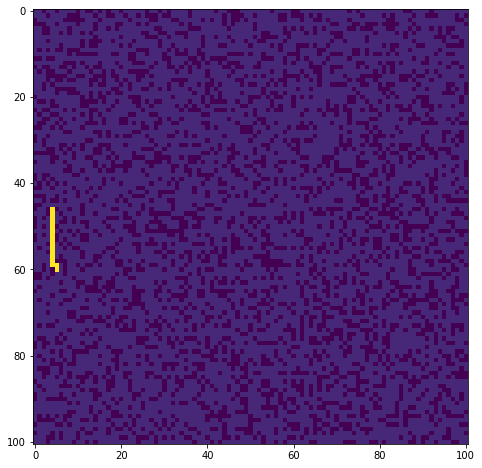

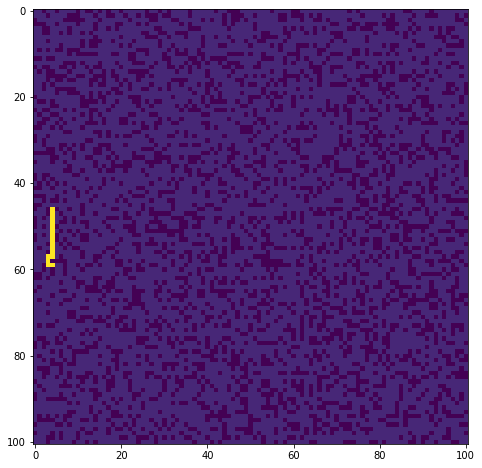

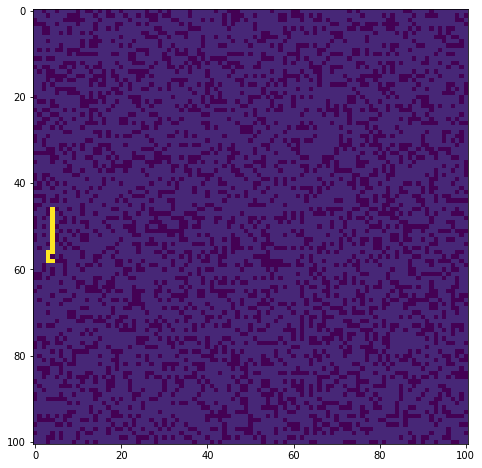

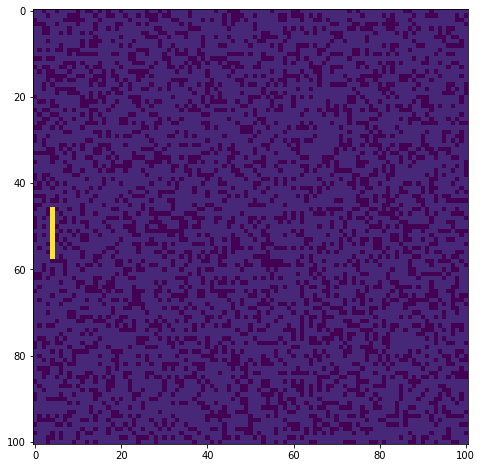

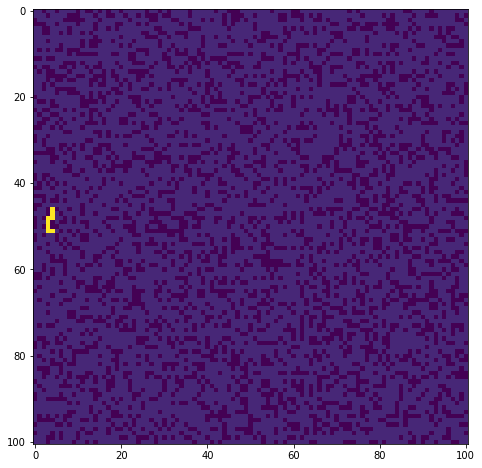

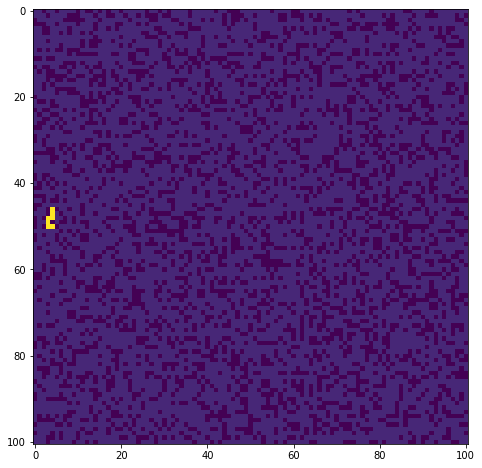

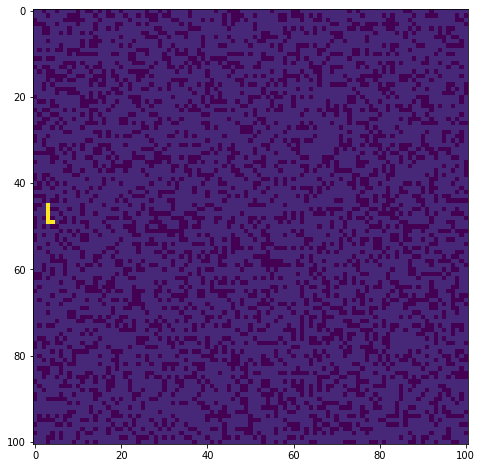

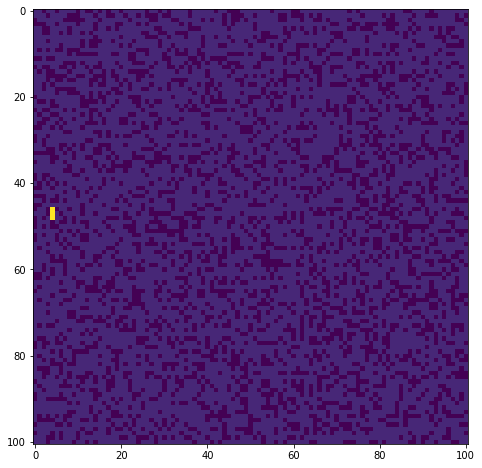

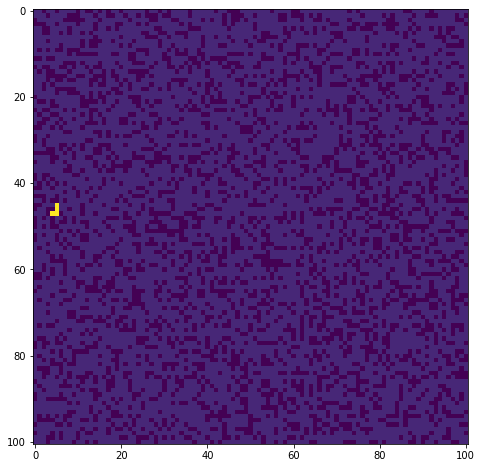

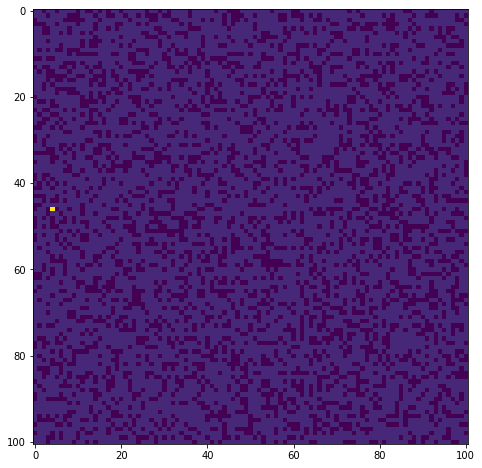

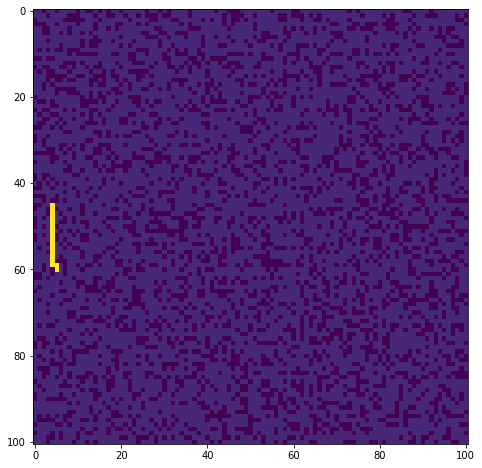

In [ ]:
path1,found_f,states_f = forwardAStar(Maze1)
print(Maze1.source)
print(Maze1.target)
print(path1)
if found_f == True:
    display_path(path1, Maze1)


In [ ]:
if found_f == True:
    clear_maze(path1, Maze1)

(60, 5)
(45, 4)


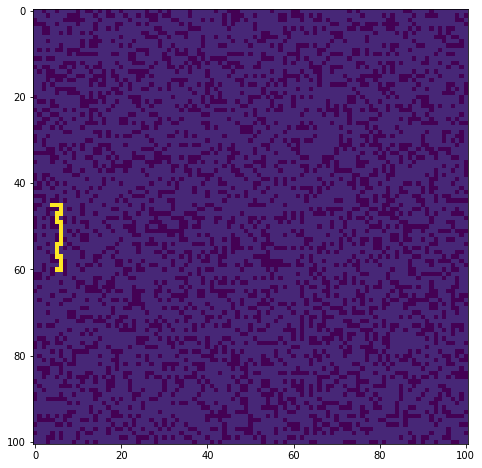

In [ ]:
path2,found_b,states_b = backwardAStar(Maze1)

if found_b== True:
    display_path(path2, Maze1)

print(Maze1.source)
print(Maze1.target)


In [ ]:
if found_b== True:
    clear_maze(path2, Maze1)

(15, 21)
(21, 69)


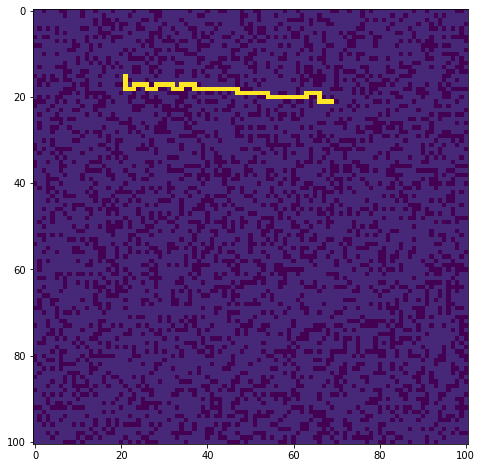

In [ ]:
path3,found,states_a = AdaptiveAStar(Maze1)
#print(path3)
print(Maze1.source)
print(Maze1.target)
if found== True:
    display_path(path3, Maze1)
# display_path(path3, Maze1)

In [ ]:
if found== True:
    clear_maze(path3, Maze1)


3978 14354 10870


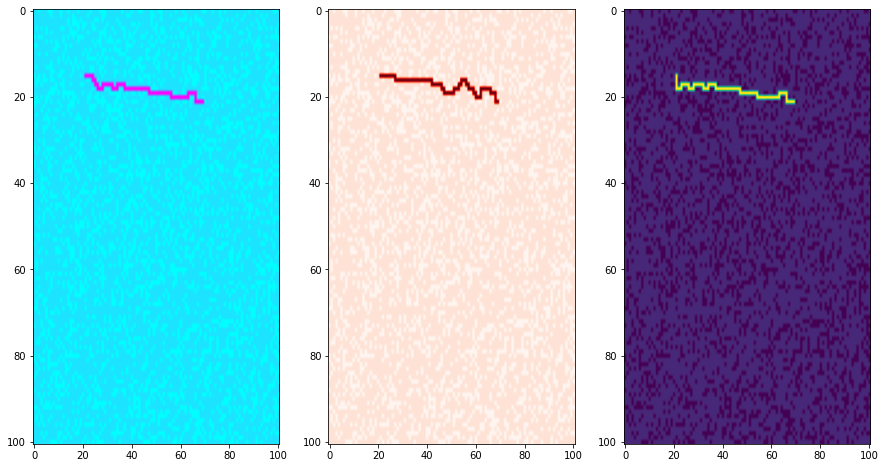

In [ ]:
f,axarr =  plt.subplots(1,3,figsize=(15,8))


maze_obj= Maze1

for node in path1:
    maze_obj.maze[node[0]][node[1]] = 9
path_m = np.asarray(maze_obj.maze)
axarr[0].imshow(path_m, aspect='auto',cmap='cool') 

clear_maze(path1, Maze1)



for node in path2:
    maze_obj.maze[node[0]][node[1]] = 9
path_m2 = np.asarray(maze_obj.maze)
axarr[1].imshow(path_m2, aspect='auto',cmap='Reds')  

clear_maze(path2, Maze1)

for node in path3:
    maze_obj.maze[node[0]][node[1]] = 9
path_m3 = np.asarray(maze_obj.maze)

 
axarr[2].imshow(path_m3, aspect='auto',cmap='viridis') 

clear_maze(path3, Maze1)
print(states_a,states_b,states_f)



In [ ]:
import pandas as pd
# generate 50 mazes for statistics
#create lists to store the values
states_total_fwd =[]
found_for=[]
states_total_bwd=[]
found_bwd=[]
states_total_ada=[]
found_ada=[]


for num in tqdm(range(50)):
    Maze1 = maze(101,101)
    path1, found_f, states_f = forwardAStar(Maze1)
#     print(forwardAStar(Maze1))
    
    states_total_fwd.append(states_f)
    found_for.append(found_f)
    
    path2, found_b, states_b = backwardAStar(Maze1)
    states_total_bwd.append(states_b)
    found_bwd.append(found_b)
    
    path3, found_a, states_a = AdaptiveAStar(Maze1)
    states_total_ada.append(states_a)
    found_ada.append(found_a)

    
# print(states_total_ada,states_total_bwd)
print(len(states_total_ada))


# df = pd.DataFrame(columns=['No_states_forward','No_of_states_backward','No_of_states_adaptive'])
df_data=[]
for num in range(len(states_total_fwd)):
    df_data.append([states_total_fwd[num],states_total_bwd[num],states_total_ada[num]])

df= pd.DataFrame(df_data,columns=['No_states_forward','No_of_states_backward','No_of_states_adaptive'])
print(df)





  0%|          | 0/50 [00:00<?, ?it/s]


  2%|▏         | 1/50 [00:03<02:28,  3.04s/it]


  4%|▍         | 2/50 [00:04<01:59,  2.50s/it]


  6%|▌         | 3/50 [00:07<02:14,  2.86s/it]


  8%|▊         | 4/50 [00:11<02:23,  3.12s/it]


 10%|█         | 5/50 [00:11<01:41,  2.25s/it]


 12%|█▏        | 6/50 [00:12<01:12,  1.64s/it]


 14%|█▍        | 7/50 [00:12<00:54,  1.26s/it]


 16%|█▌        | 8/50 [00:13<00:48,  1.15s/it]


 18%|█▊        | 9/50 [00:13<00:40,  1.02it/s]


 20%|██        | 10/50 [00:19<01:37,  2.43s/it]


 22%|██▏       | 11/50 [00:21<01:31,  2.35s/it]


 24%|██▍       | 12/50 [00:22<01:04,  1.70s/it]


 26%|██▌       | 13/50 [00:22<00:45,  1.24s/it]


 28%|██▊       | 14/50 [00:23<00:43,  1.21s/it]


 30%|███       | 15/50 [00:24<00:36,  1.03s/it]


 32%|███▏      | 16/50 [00:24<00:27,  1.26it/s]


 34%|███▍      | 17/50 [00:24<00:19,  1.65it/s]


 36%|███▌      | 18/50 [00:25<00:19,  1.60it/s]


 38%|███▊      | 19/50 [00:26<00:22,  1.38it/s]


 40%|████      

50
    No_states_forward  No_of_states_backward  No_of_states_adaptive
0                   1                  10196                      1
1                3036                   6076                   3721
2                3696                   9428                   7209
3                2179                   4920                  22548
4                 357                    846                    768
5                 214                    519                   1629
6                1047                   1667                   1577
7                3256                   4103                   3349
8                1058                   2411                   2571
9                4623                  11597                   8907
10               3524                   9444                   3844
11                304                    677                    388
12                176                    351                    217
13               1664                   5143 

In [ ]:
df['time_states']  = df['No_of_states_backward']/df['No_states_forward']
# print(df)
df['fwd_vs_adaptive'] = df['No_of_states_adaptive']/df['No_states_forward']
print(df)

    No_states_forward  No_of_states_backward  ...   time_states  fwd_vs_adaptive
0                   1                  10196  ...  10196.000000         1.000000
1                3036                   6076  ...      2.001318         1.225626
2                3696                   9428  ...      2.550866         1.950487
3                2179                   4920  ...      2.257916        10.347866
4                 357                    846  ...      2.369748         2.151261
5                 214                    519  ...      2.425234         7.612150
6                1047                   1667  ...      1.592168         1.506208
7                3256                   4103  ...      1.260135         1.028563
8                1058                   2411  ...      2.278828         2.430057
9                4623                  11597  ...      2.508544         1.926671
10               3524                   9444  ...      2.679909         1.090806
11                304       

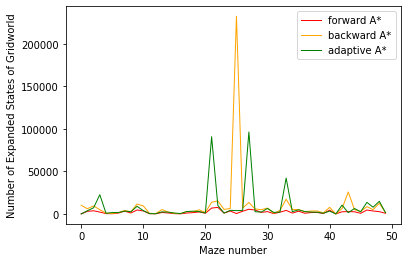

In [ ]:
plt.plot(df.No_states_forward, data=df, color='red', linewidth= 1, label ="forward A*")
plt.plot(df.No_of_states_backward, data=df, color='orange', linewidth= 1, label ="backward A*")
plt.plot(df.No_of_states_adaptive, data=df, color='green', linewidth= 1, label ="adaptive A*")
plt.ylabel('Number of Expanded States of Gridworld')
plt.xlabel('Maze number')
plt.legend()
plt.show()

In [ ]:
df.to_excel("output.xlsx")

# New Section